In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

/home/dasaradh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dasaradh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dasaradh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dasaradh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
train_dir = 'train'
validation_dir = 'validation'

In [3]:
train_elephants_dir = os.path.join(train_dir, 'elephants')  # directory with our training elephant pictures
train_tigers_dir = os.path.join(train_dir, 'tigers')  # directory with our training tiger pictures

validation_elephants_dir = os.path.join(validation_dir, 'elephants')  # directory with our validation elephant pictures
validation_tigers_dir = os.path.join(validation_dir, 'tigers')  # directory with our validation tiger pictures

In [4]:
num_elephants_tr = len(os.listdir(train_elephants_dir))
num_tigers_tr = len(os.listdir(train_tigers_dir))
num_elephants_val = len(os.listdir(validation_elephants_dir))
num_tigers_val = len(os.listdir(validation_tigers_dir))
total_train = num_elephants_tr + num_tigers_tr
total_val = num_elephants_val + num_tigers_val
print('total training elephant images:', num_elephants_tr)
print('total training tiger images:', num_tigers_tr)

print('total validation elephant images:', num_elephants_val)
print('total validation tiger images:', num_tigers_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training elephant images: 5
total training tiger images: 6
total validation elephant images: 3
total validation tiger images: 3
--
Total training images: 11
Total validation images: 6


In [5]:
batch_size = 2 #Batch size is reduced from 128 to 2 as sample data has only few images
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 11 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [8]:
print(train_data_gen.class_indices)

{'elephants': 0, 'tigers': 1}


In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [12]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5
5/5 [==============================] - 2s 408ms/step - loss: 4.6285 - accuracy: 0.4444 - val_loss: 3.0614 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 1s 187ms/step - loss: 2.0133 - accuracy: 0.5556 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 1s 185ms/step - loss: 0.7298 - accuracy: 0.4000 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 1s 188ms/step - loss: 0.6881 - accuracy: 0.4444 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 1s 175ms/step - loss: 0.6668 - accuracy: 0.6667 - val_loss: 0.6721 - val_accuracy: 0.8333


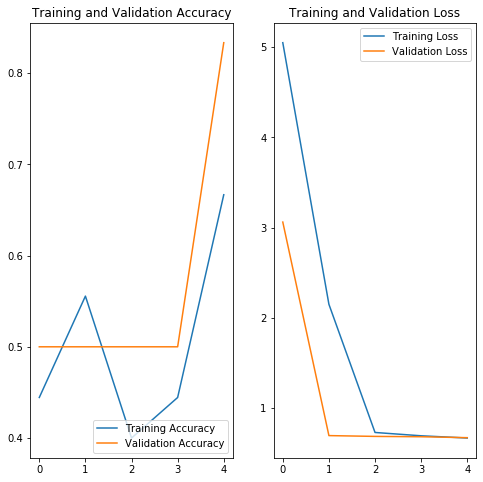

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('binaryclassificationmodel.h5')